<a href="https://colab.research.google.com/github/Jolanta27/Supervised_learning/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist_data = mnist['data']
mnist_target = mnist['target']

print(mnist_data.shape)
print(mnist_target.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:110: UserWarning: A network error occurred while downloading https://api.openml.org/data/v1/download/52667. Retrying...
  warn(


(70000, 784)
(70000,)


There are 70 000 images and each image has 784 features.

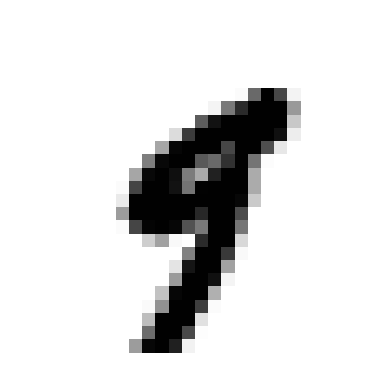

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = mnist_data.iloc[36000].values
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
print(mnist_target[36000])

9


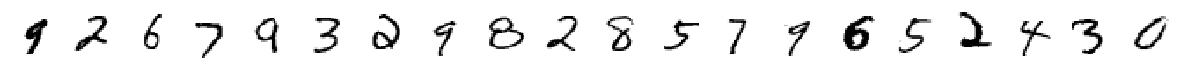

In [ ]:
num_images = 20

indices = range(36000, 36000 + num_images)

fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

for ax, idx in zip(axes, indices):
    some_digit = mnist_data.iloc[idx].values
    some_digit_image = some_digit.reshape(28, 28)
    ax.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
    ax.axis("off")

plt.show()

In [ ]:
# Podział danych na zestawy treningowe i testowe
X_train, X_test = mnist_data.iloc[:60000], mnist_data.iloc[60000:]
y_train, y_test = mnist_target.iloc[:60000], mnist_target.iloc[60000:]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000,) (10000,)


In [ ]:
import numpy as np

# Przetasowanie danych treningowych
shuffle_index = np.random.permutation(60000)
X_train = X_train.iloc[shuffle_index]
y_train = y_train.iloc[shuffle_index]

print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [ ]:
print(np.unique(y_train))

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print("Unique values in y_train_5:", np.unique(y_train_5))

Unique values in y_train_5: [False]


In [ ]:
# Sprawdzenie typu danych y_train
print("Type of y_train:", type(y_train))
print("First few elements of y_train:", y_train[:10])

# Tworzenie binarnych etykiet, gdzie True oznacza cyfrę 5, a False inne cyfry
y_train_5 = (y_train == '5')  # Jeśli y_train jest typu str
# y_train_5 = (y_train == 5)  # Jeśli y_train jest typu int

# Sprawdzenie unikalnych wartości w y_train_5
print("Unique values in y_train_5:", np.unique(y_train_5))

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Trenowanie modelu
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Przykładowa predykcja
some_digit = X_test.iloc[0]  # Zakładam, że some_digit to pierwszy obrazek z X_test
print("Prediction for some_digit:", sgd_clf.predict([some_digit]))

# Sprawdzenie kilku predykcji
predictions = sgd_clf.predict(X_test[:10])
print("Predictions for first 10 digits:", predictions)

# Sprawdzenie dokładności modelu
y_pred = sgd_clf.predict(X_test)
accuracy = accuracy_score(y_test_5, y_pred)
print("Model accuracy:", accuracy)

Type of y_train: <class 'pandas.core.series.Series'>
First few elements of y_train: 48069    5
43323    1
16545    1
19722    6
3540     1
21341    3
37300    5
50734    5
53855    7
16946    1
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
Unique values in y_train_5: [False  True]
Prediction for some_digit: [False]
Predictions for first 10 digits: [False False False False False False False False False False]
Model accuracy: 0.9235


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split

# Sprawdzenie liczby przykładów klasy 5 w zbiorze treningowym
num_fives_in_train = np.sum(y_train_5)
print("Number of 5s in the training set:", num_fives_in_train)

# Jeśli są przykłady klasy 5 w zbiorze treningowym, podzielmy zbiór na treningowy i testowy
if num_fives_in_train > 0:
    X_train_new, X_test_new, y_train_5_new, y_test_5_new = train_test_split(X_train, y_train_5, test_size=0.2, random_state=42, stratify=y_train_5)

    # Trenowanie modelu na nowym zbiorze treningowym
    sgd_clf.fit(X_train_new, y_train_5_new)

    # Sprawdzenie predykcji na nowym zbiorze testowym
    predictions = sgd_clf.predict(X_test_new[:10])
    print("Predictions for first 10 digits in new test set:", predictions)

    # Sprawdzenie dokładności modelu na nowym zbiorze testowym
    y_pred_new = sgd_clf.predict(X_test_new)
    accuracy_new = accuracy_score(y_test_5_new, y_pred_new)
    print("Model accuracy on new test set:", accuracy_new)
else:
    print("No examples of class 5 in the training set.")

Number of 5s in the training set: 5421
Predictions for first 10 digits in new test set: [False False False False  True False False False False  True]
Model accuracy on new test set: 0.9699166666666666


In [ ]:
from sklearn.model_selection import cross_val_score

# Pełny zbiór danych i etykiet
X_full = X_train
y_full = y_train_5

# Walidacja krzyżowa
cv_scores = cross_val_score(sgd_clf, X_full, y_full, cv=5, scoring='accuracy')

# Wyświetlenie wyników walidacji krzyżowej
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.95841667 0.96658333 0.94975    0.9525     0.94333333]
Mean cross-validation score: 0.9541166666666667


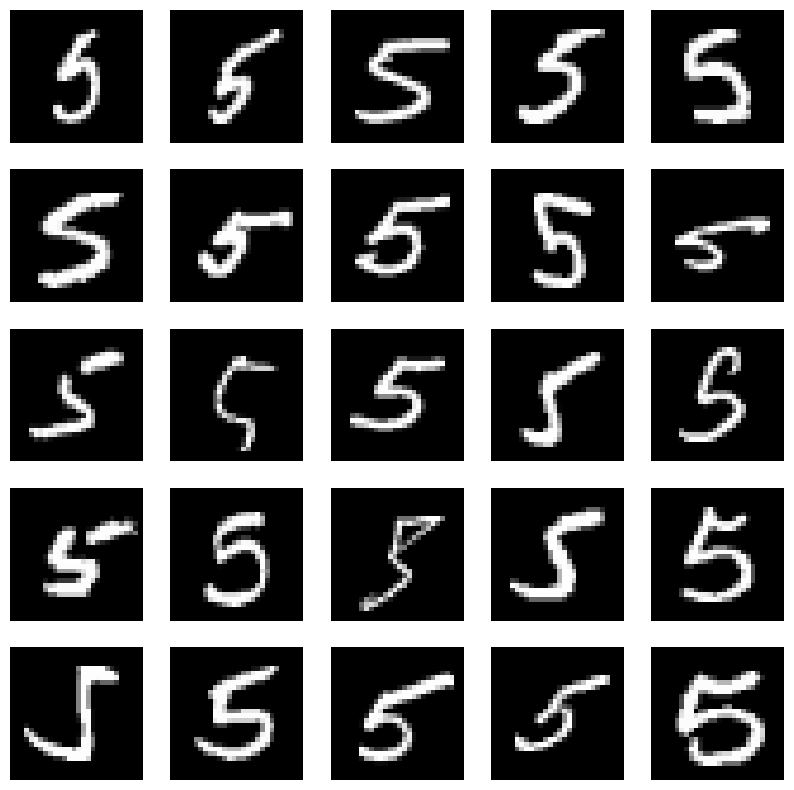

In [ ]:
import matplotlib.pyplot as plt

five_indices_new = np.where(y_test_5_new == True)[0]

num_images = len(five_indices_new)
plt.figure(figsize=(10, 10))
for i, idx in enumerate(five_indices_new[:25]):  # Wyświetlenie maksymalnie 25 obrazów
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_new.iloc[idx].values.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np

# Generowanie szumu dla zbioru treningowego
noise_train = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise_train

# Generowanie szumu dla zbioru testowego
noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise_test

# Etykiety dla zmodyfikowanych danych
y_train_mod = X_train
y_test_mod = X_test

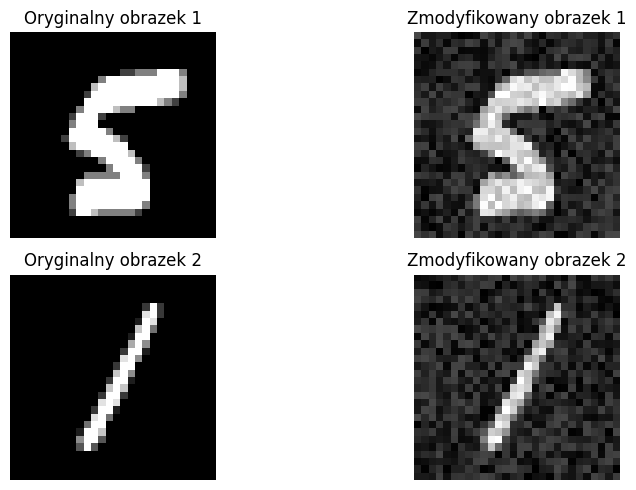

In [ ]:
import matplotlib.pyplot as plt

#Dwa indeksy obrazków do wyświetlenia
index1 = 0
index2 = 1

# Wyświetlenie oryginalnych i zmodyfikowanych obrazków
plt.figure(figsize=(10, 5))

# Oryginalny obrazek 1
plt.subplot(2, 2, 1)
plt.imshow(X_train.iloc[index1].values.reshape(28, 28), cmap='gray')
plt.title("Oryginalny obrazek 1")
plt.axis('off')

# Zmodyfikowany obrazek 1
plt.subplot(2, 2, 2)
plt.imshow(X_train_mod.iloc[index1].values.reshape(28, 28), cmap='gray')
plt.title("Zmodyfikowany obrazek 1")
plt.axis('off')

# Oryginalny obrazek 2
plt.subplot(2, 2, 3)
plt.imshow(X_train.iloc[index2].values.reshape(28, 28), cmap='gray')
plt.title("Oryginalny obrazek 2")
plt.axis('off')

# Zmodyfikowany obrazek 2
plt.subplot(2, 2, 4)
plt.imshow(X_train_mod.iloc[index2].values.reshape(28, 28), cmap='gray')
plt.title("Zmodyfikowany obrazek 2")
plt.axis('off')

plt.tight_layout()
plt.show()

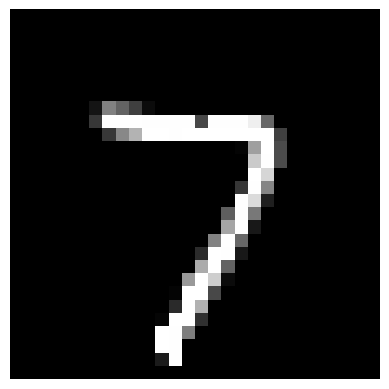

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# Konwersja danych na tablice NumPy
X_train_mod_np = X_train_mod.values
y_train_mod_np = y_train_mod.values
X_test_mod_np = X_test_mod.values

# Inicjalizacja klasyfikatora KNN
knn_clf = KNeighborsClassifier()

# Trenowanie klasyfikatora na zmodyfikowanych danych
knn_clf.fit(X_train_mod_np, y_train_mod_np)

# Wybór indeksu obrazu do oczyszczenia
some_index = 0

# Przewidywanie czystego obrazu na podstawie zmodyfikowanego obrazu
clean_digit = knn_clf.predict([X_test_mod_np[some_index]])

# Wyświetlenie przewidzianego czystego obrazu
plot_digit(clean_digit)